In [1]:
suppressMessages(library(ggplot2))
suppressMessages(library(ComplexHeatmap))
suppressMessages(library(dplyr))
suppressMessages(library(tidyr))
suppressMessages(library(textshape))
suppressMessages(library(circlize))
suppressMessages(library(RColorBrewer))
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(viridis))

png 
  2

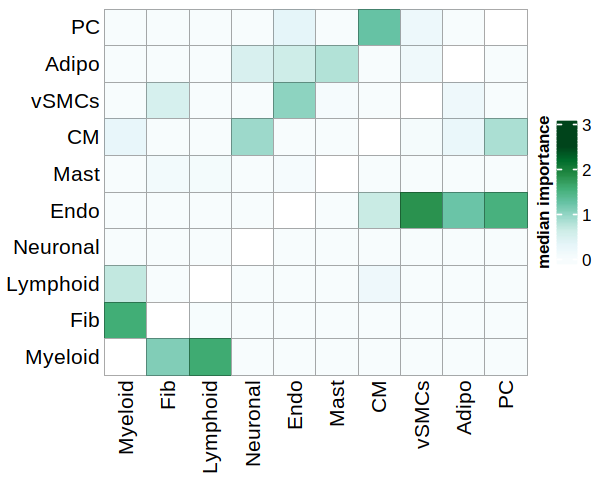

In [5]:
## panel a
df <- read.csv("../MISTy_cellinteractions/misty_importances_ct.csv", header = TRUE)

df_median_importance <- subset(df, view == "intra") %>%
    select(c(Predictor, Target, median_importance)) %>%
    pivot_wider(names_from = Target, values_from = median_importance, values_fill = 0) %>%
    column_to_rownames('Predictor')

df_p_value <- subset(df, view == "intra") %>%
    select(c(Predictor, Target, p_adjust)) %>%
    pivot_wider(names_from = Target, values_from = p_adjust, values_fill = 0) %>%
    column_to_rownames('Predictor')

df_p_value[is.na(df_p_value)] <- 1

col_orders <- c("Myeloid", "Fib", "Lymphoid", "Neuronal", 
                "Endo", "Mast", "CM", 
                "vSMCs", "Adipo", "PC")

df_median_importance <- df_median_importance[rev(col_orders), col_orders]
df_p_value <- df_p_value[rev(col_orders), col_orders]

#rownames(df_median_importance) <- c("" "Adipocytes", "Neuronal", "vSMCs", "Endothelial",
#                       "Pericyte", "vCMs", "Mast cells", "Lymphoid", "Fibroblast", "Myeloid")
#colnames(df_median_importance) <- rev(rownames(df_median_importance))

col_fun <- colorRamp2(seq(from = 0, to = 2.5, length = 9), 
                     RColorBrewer::brewer.pal(name = "BuGn", n = 9))

ht <- Heatmap(as.matrix(df_median_importance), 
               name = "median importance",
               cluster_columns = FALSE,
              cluster_rows = FALSE,
               rect_gp = gpar(col = "black", lwd = 0.2),
               heatmap_legend_param = list(
                title = "median importance",
               title_position = "leftcenter-rot",
               legend_height = unit(3, "cm")),
              col = col_fun,
              na_col = "white",
             row_names_side = "left"
             # cell_fun = function(j, i, x, y, width, height, fill) {
             #     if (df_p_value[i, j] < 0.05){
             #         grid.text("*", x, y, gp = gpar(fontsize = 15))
             #     }}
                 )

options(repr.plot.height = 4, repr.plot.width = 5)

ht
                 
pdf("a_misty_cell_type.pdf", height = 4, width = 5)
draw(ht)
dev.off()

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



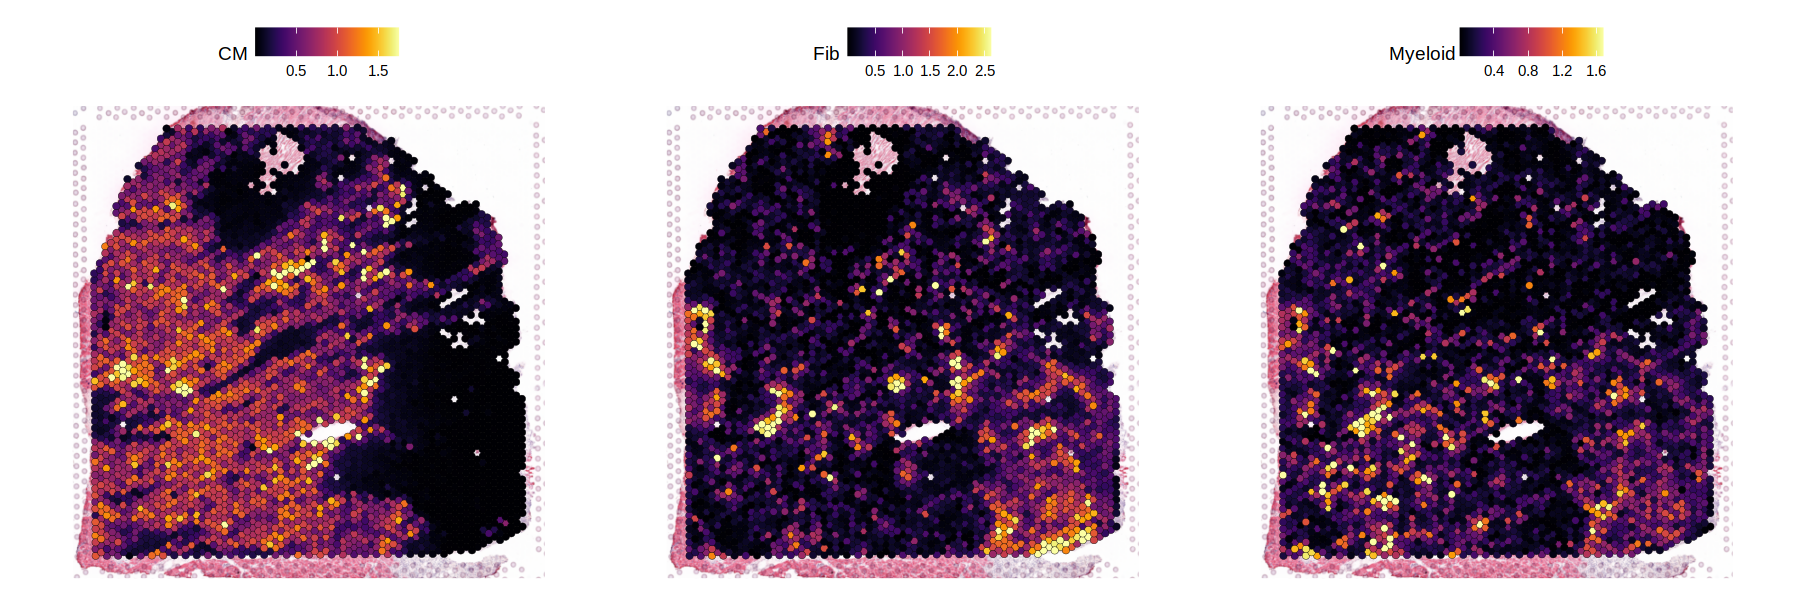

In [3]:
## panel b
obj <- readRDS('../../../../visiumSpatial/from_rico/processed_visium/objects/Visium_9_CK287.rds')
DefaultAssay(obj) <- "c2l"

pt.size.factor <- 1.45

p1 <- SpatialFeaturePlot(obj, feature = "CM", 
                   max.cutoff = "q99", pt.size.factor = pt.size.factor) + scale_fill_viridis(option = "B")

p2 <- SpatialFeaturePlot(obj, feature = "Fib", 
                   max.cutoff = "q99", pt.size.factor = pt.size.factor) + scale_fill_viridis(option = "B")

p3 <- SpatialFeaturePlot(obj, feature = "Myeloid", 
                   max.cutoff = "q99", pt.size.factor = pt.size.factor) + scale_fill_viridis(option = "B")


ggsave("b_CM_intra_view.pdf", plot = p1, height = 5, width = 5)
ggsave("b_Fib_intra_view.pdf", plot = p2, height = 5, width = 5)
ggsave("b_Myeloid_intra_view.pdf", plot = p3, height = 5, width = 5)


p <- patchwork::wrap_plots(list(p1, p2, p3), nrow = 1)

options(repr.plot.height = 5, repr.plot.width = 15)
p

view  Predictor Target   median_importance statistic p.value     
1 intra Androgen  Androgen          NA        NA                 NA
2 intra Androgen  EGFR     -0.29775772         2       1.000000e+00
3 intra Androgen  Estrogen -0.58448257         0       1.000000e+00
4 intra Androgen  Hypoxia   1.74794251       322       1.490116e-07
5 intra Androgen  JAK.STAT -0.04249551       190       6.189305e-01
6 intra Androgen  MAPK     -0.31648177        51       9.998912e-01
  method                          alternative p_adjust     sign_label
1 NA                              NA                    NA NA        
2 Wilcoxon signed rank exact test greater     1.000000e+00           
3 Wilcoxon signed rank exact test greater     1.000000e+00           
4 Wilcoxon signed rank exact test greater     2.235174e-05 *         
5 Wilcoxon signed rank exact test greater     1.000000e+00           
6 Wilcoxon signed rank exact test greater     1.000000e+00

png 
  2

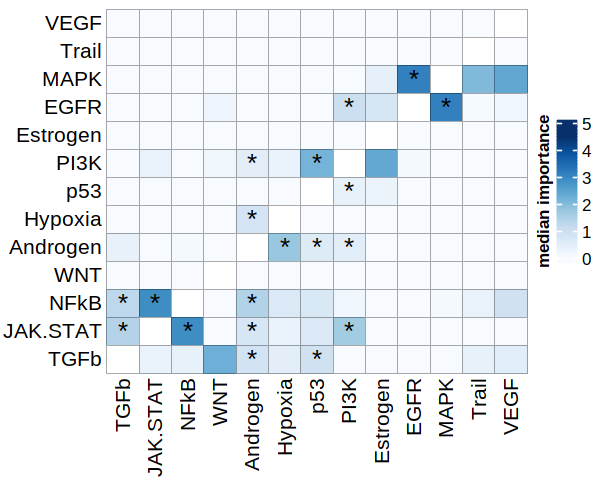

In [4]:
## panel c
df <- read.csv("../MISTy_pathways/importances_progeny_ct_median.csv", header = TRUE)
head(df)

df_median_importance <- subset(df, view == "intra") %>%
    select(c(Predictor, Target, median_importance)) %>%
    pivot_wider(names_from = Target, values_from = median_importance, values_fill = 0) %>%
    column_to_rownames('Predictor')

df_p_value <- subset(df, view == "intra") %>%
    select(c(Predictor, Target, p_adjust)) %>%
    pivot_wider(names_from = Target, values_from = p_adjust, values_fill = 1) %>%
    column_to_rownames('Predictor')

df_p_value[is.na(df_p_value)] <- 1

row.order <- c("TGFb", "JAK.STAT", "NFkB", "WNT", "Androgen", "Hypoxia", "p53", "PI3K",
              "Estrogen", "EGFR", "MAPK", "Trail", "VEGF")

df_median_importance <- df_median_importance[rev(row.order), row.order]
df_p_value <- df_p_value[rev(row.order), row.order]

col_fun = colorRamp2(seq(from = 0, to = 4.5, length = 9), 
                     RColorBrewer::brewer.pal(name = "Blues", n = 9))

ht <- Heatmap(as.matrix(df_median_importance), 
               name = "median importance",
               cluster_columns = FALSE,
              cluster_rows = FALSE,
             #show_row_dend = TRUE,
              #show_column_dend = TRUE,
              #row_dend_side = "right",
              #column_dend_side = "top",
                #clustering_method_rows = "ward.D2",
              #clustering_method_columns = "ward.D2",
               rect_gp = gpar(col = "black", lwd = 0.2),
               heatmap_legend_param = list(
                title = "median importance",
               title_position = "leftcenter-rot",
               legend_height = unit(3, "cm")),
              col = col_fun,
              na_col = "white",
             row_names_side = "left",
                          cell_fun = function(j, i, x, y, width, height, fill) {
                 if (df_p_value[i, j] < 0.05){
                     grid.text("*", x, y, gp = gpar(fontsize = 15))
                 }})

options(repr.plot.height = 4, repr.plot.width = 5)

ht

pdf("c_misty_progeny.pdf", height = 4, width = 5)
draw(ht)
dev.off()

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



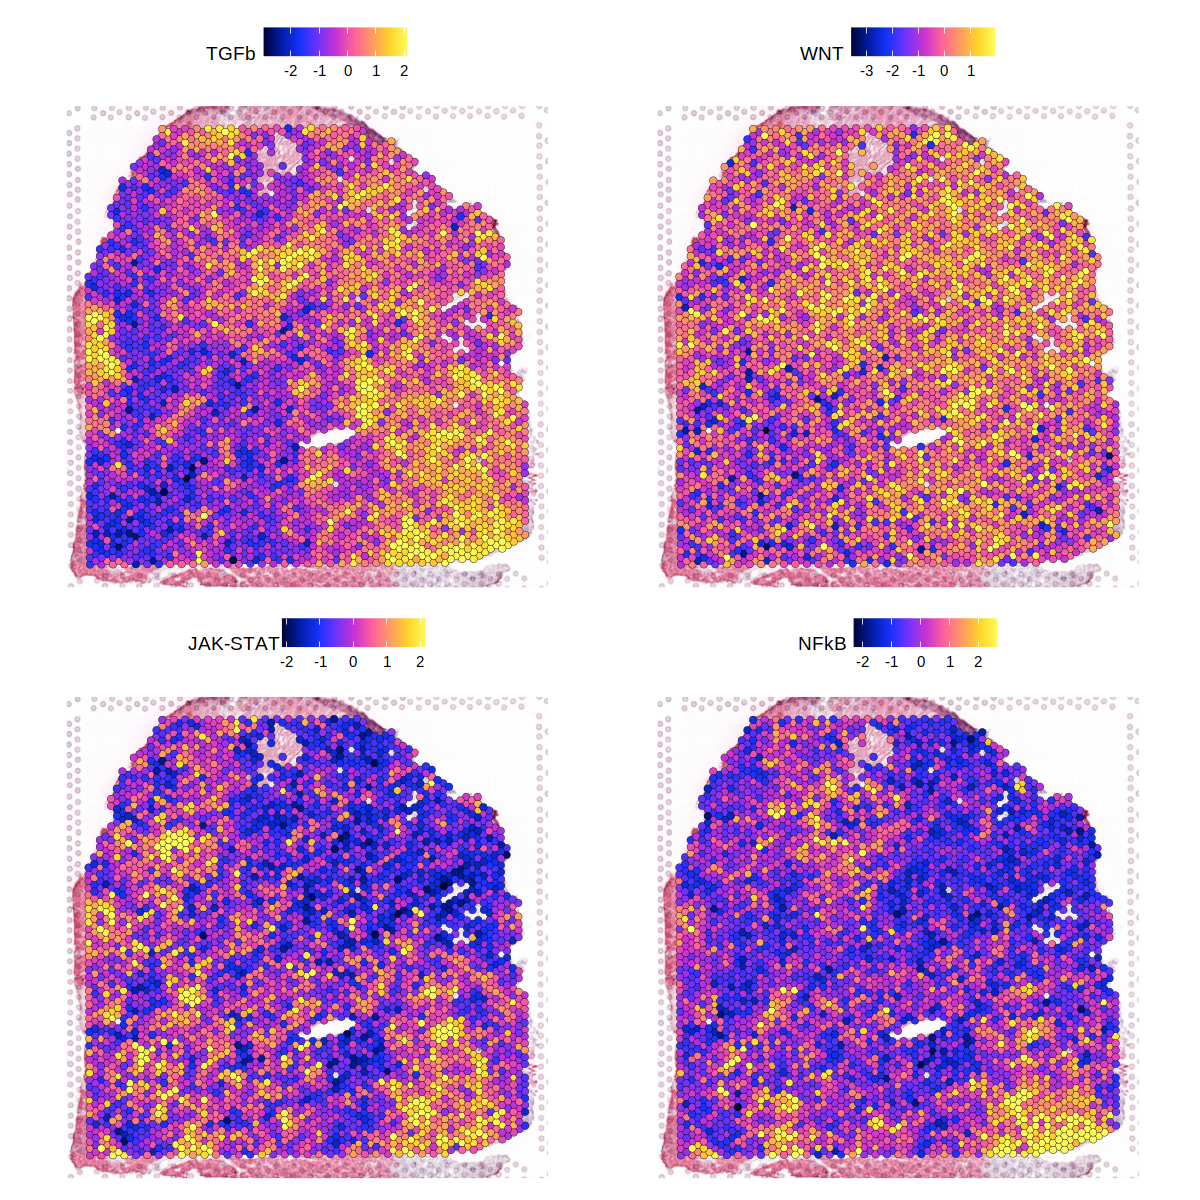

In [5]:
## panel d
obj <- readRDS('../../../../visiumSpatial/from_rico/processed_visium/objects/Visium_9_CK287.rds')
DefaultAssay(obj) <- "progeny"

p1 <- SpatialFeaturePlot(obj, features = "TGFb", max.cutoff = "q95", pt.size.factor = pt.size.factor) +
    scale_fill_gradientn(colors = ArchR::paletteContinuous("horizonExtra", n = 256))

p2 <- SpatialFeaturePlot(obj, features = "WNT", max.cutoff = "q95", pt.size.factor = pt.size.factor) +
    scale_fill_gradientn(colors = ArchR::paletteContinuous("horizonExtra", n = 256))

p3 <- SpatialFeaturePlot(obj, features = "JAK-STAT", max.cutoff = "q95", pt.size.factor = pt.size.factor) +
    scale_fill_gradientn(colors = ArchR::paletteContinuous("horizonExtra", n = 256))

p4 <- SpatialFeaturePlot(obj, features = "NFkB", max.cutoff = "q95", pt.size.factor = pt.size.factor) +
    scale_fill_gradientn(colors = ArchR::paletteContinuous("horizonExtra", n = 256))


ggsave("d_TGFb_intra_view.pdf", plot = p1, height = 5, width = 5)
ggsave("d_WNT_intra_view.pdf", plot = p2, height = 5, width = 5)
ggsave("d_JAK-STAT_intra_view.pdf", plot = p3, height = 5, width = 5)
ggsave("d_NFkB_intra_view.pdf", plot = p3, height = 5, width = 5)

p <- patchwork::wrap_plots(list(p1, p2, p3, p4), nrow = 2)

options(repr.plot.height = 10, repr.plot.width = 10)
p

png 
  2

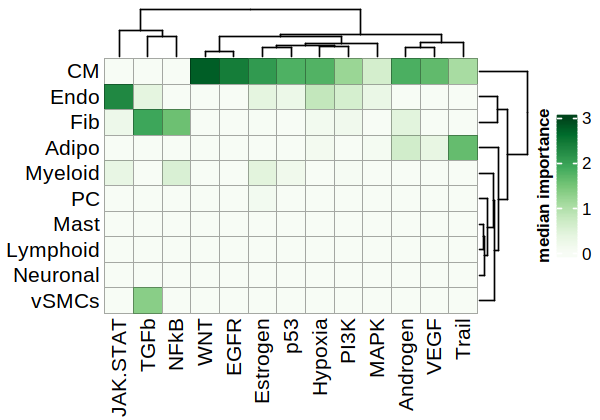

In [6]:
## panel e
df <- read.csv("../MISTy_pathways/importances_progeny_ct_median.csv", header = TRUE)

df_median_importance <- subset(df, view == "intra_ct") %>%
    select(c(Predictor, Target, median_importance)) %>%
    pivot_wider(names_from = Target, values_from = median_importance, values_fill = 0) %>%
    column_to_rownames('Predictor')

df_p_value <- subset(df, view == "intra_ct") %>%
    select(c(Predictor, Target, p_adjust)) %>%
    pivot_wider(names_from = Target, values_from = p_adjust, values_fill = 0) %>%
    column_to_rownames('Predictor')

df_p_value[is.na(df_p_value)] <- 1

# col_orders <- c("Myeloid", "Fib", "Lymphoid", "Neuronal", 
#                 "Endo", "Mast", "CM", 
#                 "vSMCs", "Adipo", "PC")

# df_median_importance <- df_median_importance[rev(col_orders), col_orders]
# df_p_value <- df_p_value[rev(col_orders), col_orders]

#rownames(df_median_importance) <- c("" "Adipocytes", "Neuronal", "vSMCs", "Endothelial",
#                       "Pericyte", "vCMs", "Mast cells", "Lymphoid", "Fibroblast", "Myeloid")
#colnames(df_median_importance) <- rev(rownames(df_median_importance))

col_fun <- colorRamp2(seq(from = 0, to = 3, length = 9), 
                     RColorBrewer::brewer.pal(name = "Greens", n = 9))

ht <- Heatmap(as.matrix(df_median_importance), 
               name = "median importance",
               cluster_columns = TRUE,
              cluster_rows = TRUE,
             show_row_dend = FALSE,
              show_column_dend = FALSE,
              row_dend_side = "right",
              column_dend_side = "top",
                              clustering_method_rows = "ward.D2",
              clustering_method_columns = "ward.D2",
               rect_gp = gpar(col = "black", lwd = 0.2),
               heatmap_legend_param = list(
                title = "median importance",
               title_position = "leftcenter-rot",
               legend_height = unit(3, "cm")),
              col = col_fun,
              na_col = "white",
             row_names_side = "left"
             # cell_fun = function(j, i, x, y, width, height, fill) {
             #     if (df_p_value[i, j] < 0.05){
             #         grid.text("*", x, y, gp = gpar(fontsize = 15))
             #     }}
                 )

options(repr.plot.height = 3.5, repr.plot.width = 5)

ht
                 
pdf("e_misty_cell_type_progeny.pdf", height = 3.5, width = 5)
draw(ht)
dev.off()

Warning message:
“Cannot add objects with duplicate keys (offending key: UMAP_), setting key to 'umap_ilr_'”


niche_1   niche_2   niche_3   niche_4   niche_5   niche_6   niche_7   niche_8 
"#D51F26" "#272E6A" "#208A42" "#89288F" "#F47D2B" "#FEE500" "#8A9FD1" "#C06CAB" 
  niche_9 
"#D8A767"

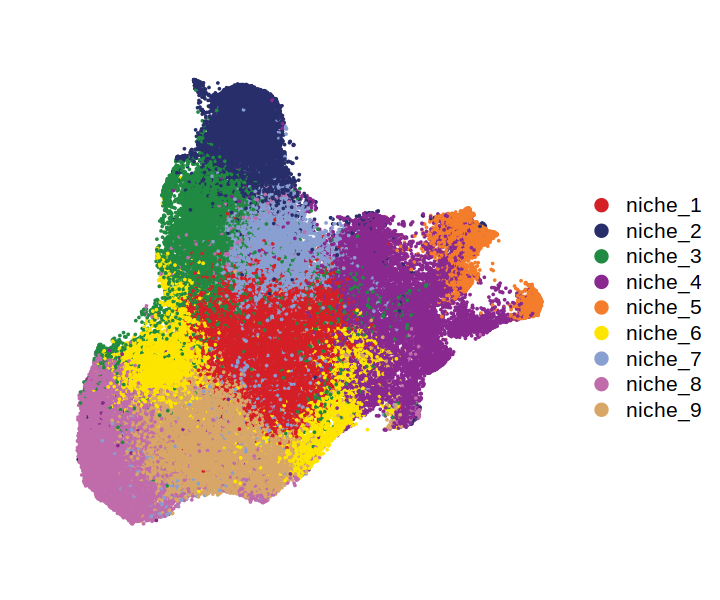

In [2]:
## panel f
obj <- readRDS("../../../../final_results/integrated_visium/integrated_slides_ann.rds")

## get dim. reduction
embedding <- as.matrix(obj@meta.data[, c("UMAP_1_ILR", "UMAP_2_ILR")])
colnames(embedding) <- c("UMAP_ILR_1", "UMAP_ILR_2")

obj[['umap_ILR']] <- CreateDimReducObject(embeddings = embedding, assay = "Spatial")

options(repr.plot.height = 5, repr.plot.width = 6)
cols <- ArchR::paletteDiscrete(unique(obj$niche_ILR))

cols

p <- DimPlot(obj, reduction = "umap_ILR", group.by = "niche_ILR",
       cols = cols, pt.size = 0.0001, shuffle = TRUE) + ggtitle("") +
    xlab("") + ylab("") +
    theme(axis.ticks = element_blank(),
         axis.text = element_blank(),
         axis.line = element_blank())

p

ggsave("f_niche.pdf", plot = p, height = 5, width = 6)

In [3]:
obj

An object of class Seurat 
39021 features across 91517 samples within 4 assays 
Active assay: Spatial (19325 features, 0 variable features)
 3 other assays present: SCT, dorothea, progeny
 5 dimensional reductions calculated: pca, harmony, umap_harmony, umap_original, umap_ILR

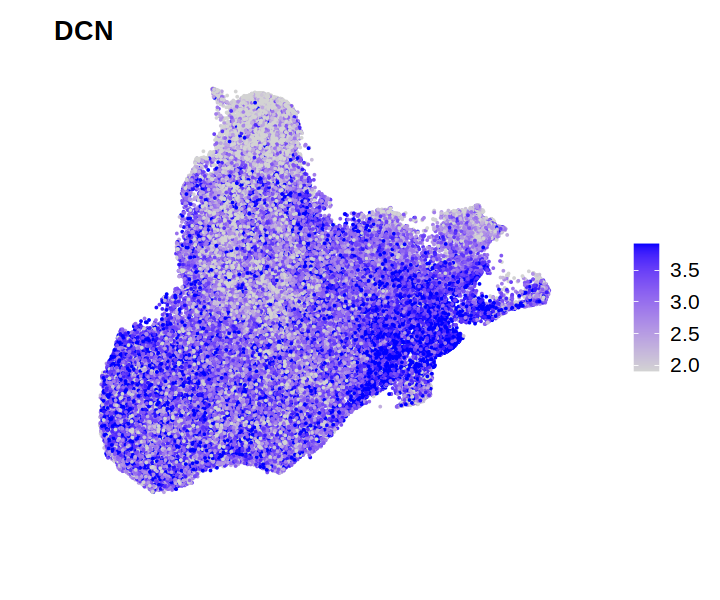

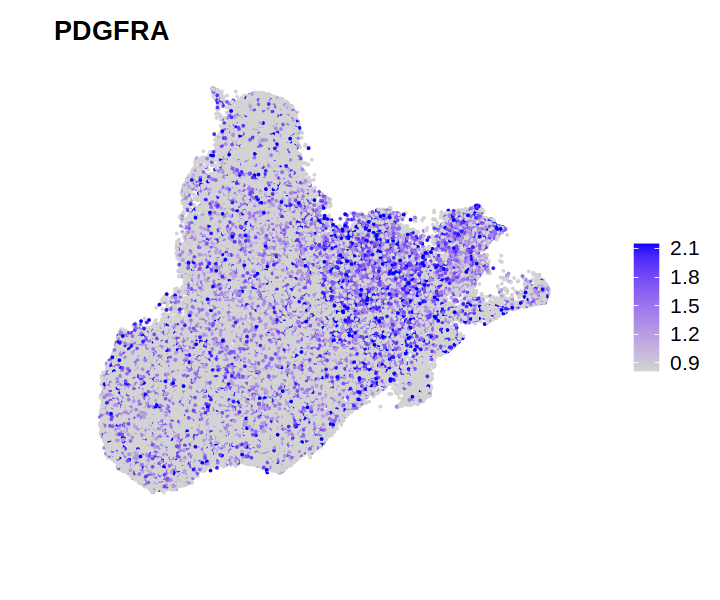

In [21]:
suppressMessages(library(Nebulosa))
suppressMessages(library(cowplot))

DefaultAssay(obj) <- "SCT"

gene.list <- c(
    "GPAM", "FASN", # adipocytes
     "RYR2", "MYH7", # vCMs
    "VWF", "PECAM1", # Endo
    "DCN", "PDGFRA", # Fib
    "CD8A", "IL7R", # Lymphoid
    "KIT", "CPA3", # Mast cells
    "CD14", "C1QA", # Myeloid
    "NRXN1", # Neuronal 
    "RGS5", "ABCC9", # Pericyte
    "MKI67", # cycling
    "MYH11", "MYLK" # vSMCs
    )

for(gene in gene.list){
    p <- plot_density(obj, reduction = "umap_ILR", feature = gene, 
                      pal = "plasma") + 
    # p <- FeaturePlot(obj, reduction = "umap_ILR", feature = gene,
    #                 min.cutoff = "q10", max.cutoff = "q90") + 
    xlab("") + ylab("") +
    theme_cowplot() +
    theme(axis.ticks = element_blank(),
         axis.text = element_blank(),
         axis.line = element_blank())

    
    print(p)
    
    ggsave(glue::glue("f_gene_{gene}.pdf"), plot = p, height = 5, width = 6)
}


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



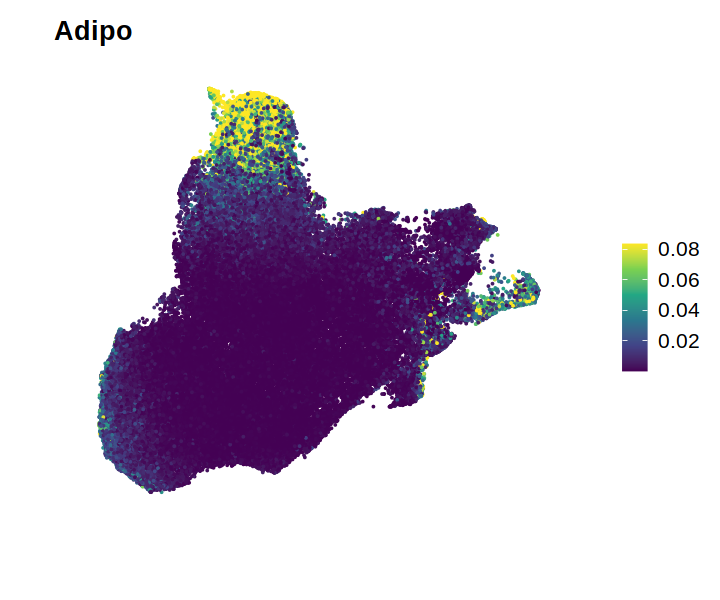

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



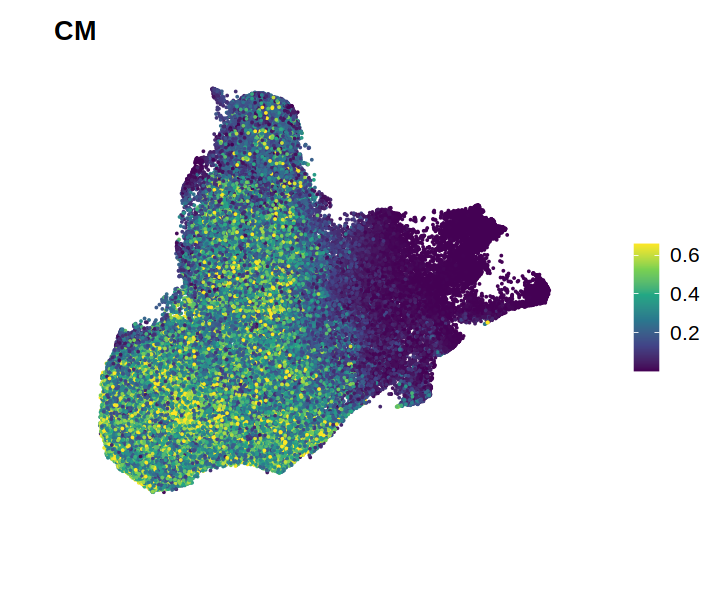

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



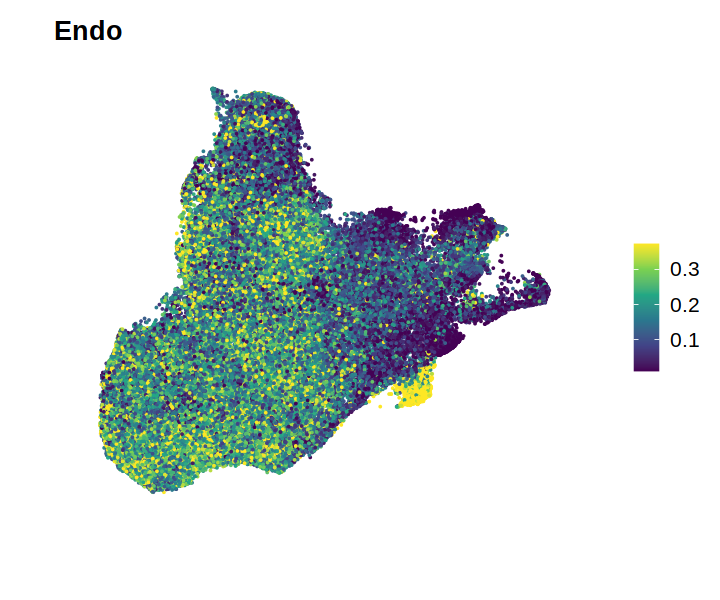

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



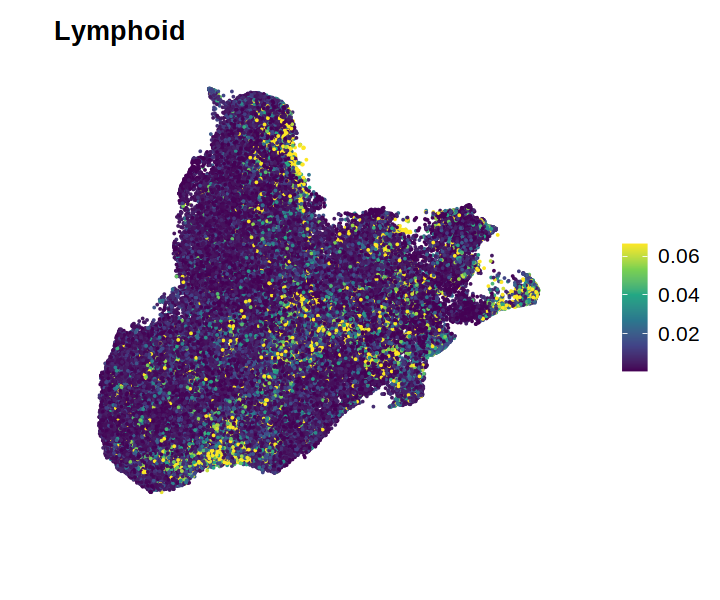

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



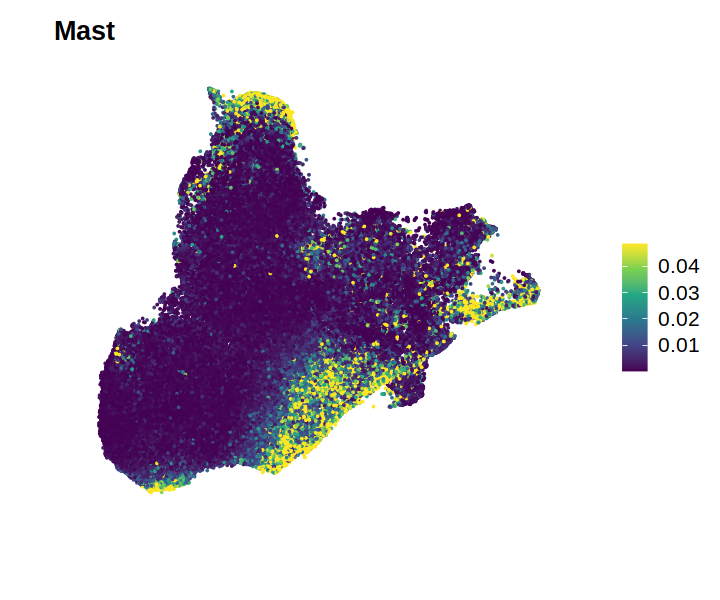

Warning message:
“The following variables were found in both object metadata and the default assay: PC
Returning metadata; if you want the feature, please use the assay's key (eg. sct_PC)”
Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



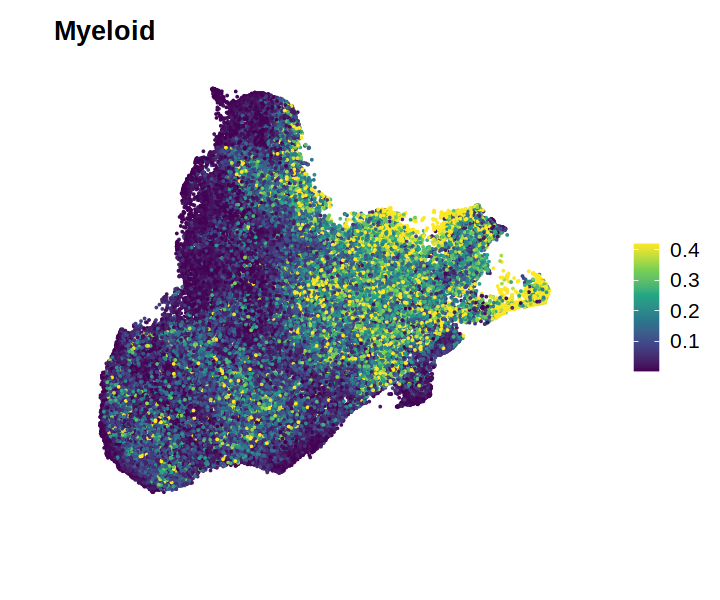

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



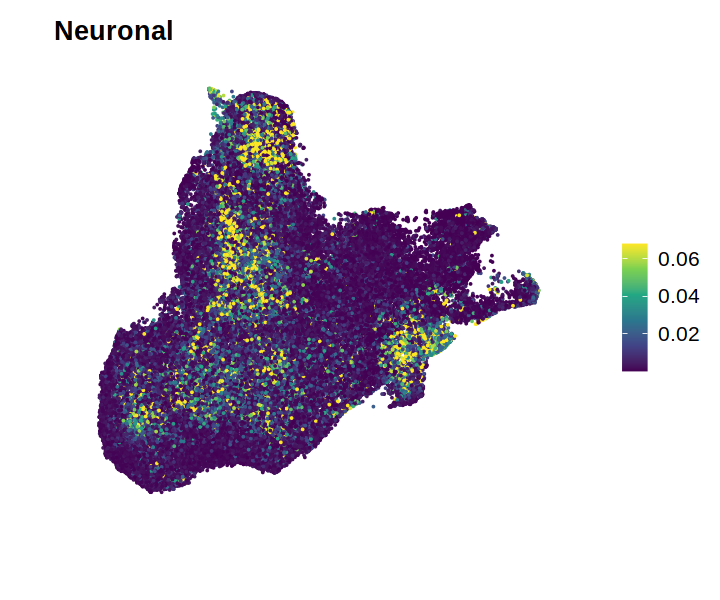

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



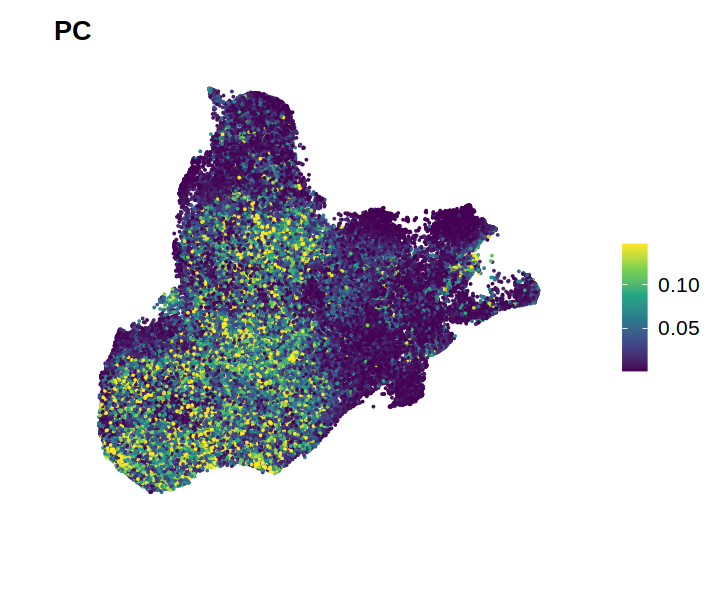

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



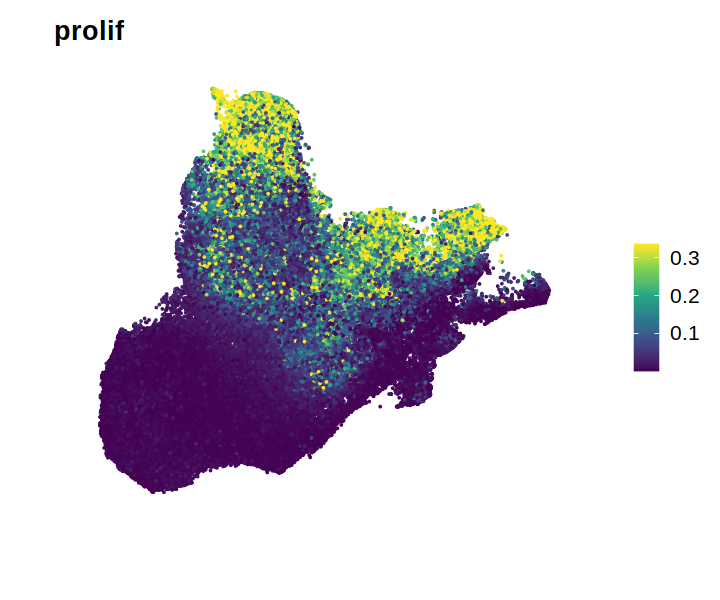

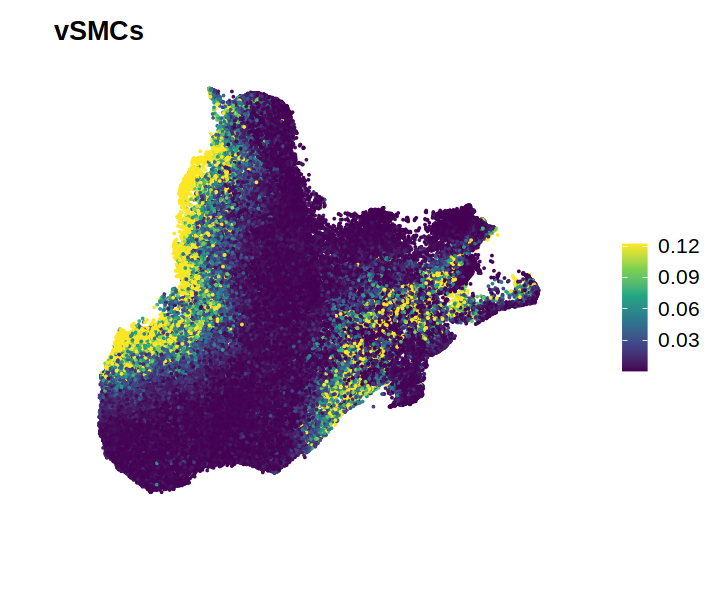

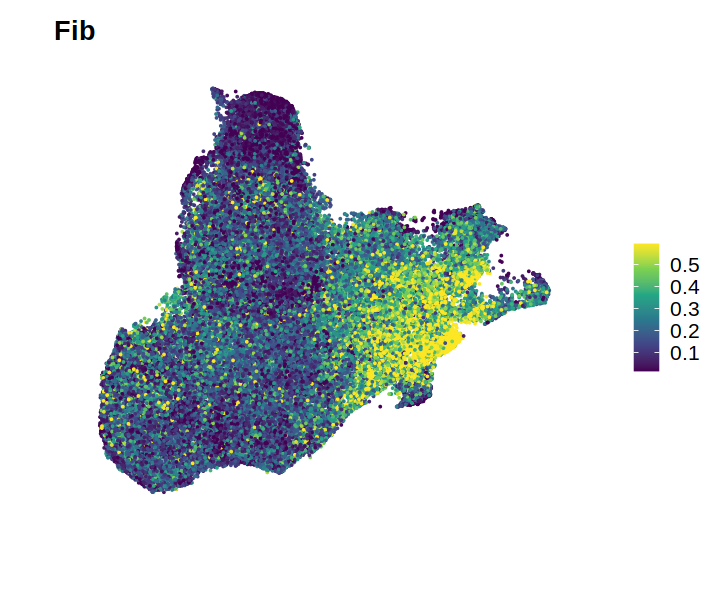

In [22]:
celltype.list <- c("Adipo", "CM", "Endo", "Lymphoid", "Mast", "Myeloid", "Neuronal",
                  "PC", "prolif", "vSMCs", "Fib")

#celltype.list <- c("Fib")

for(celltype in celltype.list){
    #p <- plot_density(obj, reduction = "umap_ILR", feature = celltype) + 
    p <- FeaturePlot(obj, reduction = "umap_ILR", feature = celltype,
                    min.cutoff = "q5", max.cutoff = "q95") + 
    scale_color_viridis_c() +
    xlab("") + ylab("") +
    theme_cowplot() +
    theme(axis.ticks = element_blank(),
         axis.text = element_blank(),
         axis.line = element_blank())

    print(p)
    
    ggsave(glue::glue("f_celltype_{celltype}.pdf"), plot = p, height = 5, width = 6)
}

ct_niche cell_type patient_median_ct_prop statistic p.value   
1 niche_1  Adipo     6.431094e-05            664      1.00000000
2 niche_1  CM        3.004225e-01           3166      0.02846426
3 niche_1  Endo      1.781010e-01           3072      0.05465505
4 niche_1  Fib       1.779011e-01           2435      0.67328714
5 niche_1  Lymphoid  4.320090e-03           2471      0.63048386
6 niche_1  Mast      6.919071e-04           1771      0.99514829
  method                                            alternative p_corr
1 Wilcoxon rank sum test with continuity correction greater     1     
2 Wilcoxon rank sum test with continuity correction greater     1     
3 Wilcoxon rank sum test with continuity correction greater     1     
4 Wilcoxon rank sum test with continuity correction greater     1     
5 Wilcoxon rank sum test with continuity correction greater     1     
6 Wilcoxon rank sum test with continuity correction greater     1     
  significant scaled_pat_median
1             -0.6094053       
2              0.5039474       
3              0.6602788       
4             -0.3984058       
5             -0.3756451       
6             -0.7505478

png 
  2

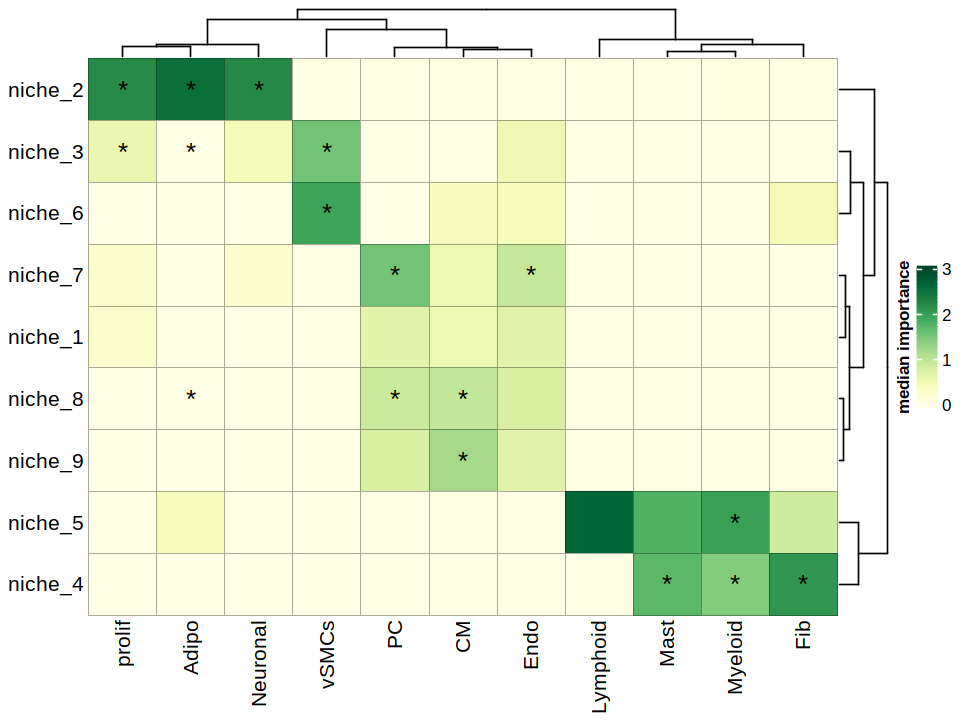

In [11]:
## panel g
df <- read.csv("../CellTypeNiches/ct_niches_description.csv")

head(df)

df_patient_median_ct_prop <- df %>%
    select(c(ct_niche, cell_type, scaled_pat_median)) %>%
    pivot_wider(names_from = cell_type, values_from = scaled_pat_median, values_fill = 0) %>%
    column_to_rownames('ct_niche')

df_p_corr <- df %>%
    select(c(ct_niche, cell_type, p_corr)) %>%
    pivot_wider(names_from = cell_type, values_from = p_corr, values_fill = 0) %>%
    column_to_rownames('ct_niche')

df_p_corr[is.na(df_p_corr)] <- 1

# col_orders <- c("Myeloid", "Fib", "Lymphoid", "Neuronal", 
#                 "Endo", "Mast", "CM", 
#                 "vSMCs", "Adipo", "PC")

# df_median_importance <- df_median_importance[rev(col_orders), col_orders]
# df_p_value <- df_p_value[rev(col_orders), col_orders]

#rownames(df_median_importance) <- c("" "Adipocytes", "Neuronal", "vSMCs", "Endothelial",
#                       "Pericyte", "vCMs", "Mast cells", "Lymphoid", "Fibroblast", "Myeloid")
#colnames(df_median_importance) <- rev(rownames(df_median_importance))

col_fun <- colorRamp2(seq(from = 0, to = 3, length = 9), 
                     RColorBrewer::brewer.pal(name = "YlGn", n = 9))

ht <- Heatmap(as.matrix(df_patient_median_ct_prop), 
               name = "scaled_pat_median",
               cluster_columns = TRUE,
              cluster_rows = TRUE,
                clustering_method_rows = "ward.D2",
              clustering_method_columns = "ward.D2",
              # clustering_distance_rows = "pearson",
              #clustering_distance_columns = "pearson",
              show_row_dend = TRUE,
              show_column_dend = TRUE,
              row_dend_side = "right",
              column_dend_side = "top",
               rect_gp = gpar(col = "black", lwd = 0.2),
               heatmap_legend_param = list(
                title = "median importance",
               title_position = "leftcenter-rot",
               legend_height = unit(3, "cm")),
              col = col_fun,
              na_col = "white",
             row_names_side = "left",
             cell_fun = function(j, i, x, y, width, height, fill) {
                 if (df_p_corr[i, j] < 0.15){
                     grid.text("*", x, y, gp = gpar(fontsize = 15))
                 }}
                 )

options(repr.plot.height = 6, repr.plot.width = 8)

ht
                 
pdf("g_niche_cell_type.pdf", height = 4, width = 5)
draw(ht)
dev.off()